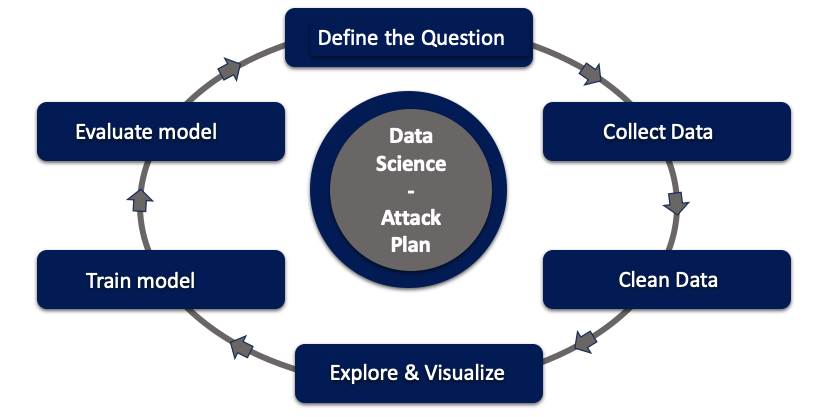

# Imports

In [6]:
from numpy.random import seed
seed(888)

#from tensorflow import set_random_seed
#set_random_seed(4112)
import tensorflow
tensorflow.random.set_seed(112)

In [132]:
import os
import numpy as np
import itertools

import tensorflow as tf
import keras
from keras.datasets import cifar10 # importing the dataset

from keras.models import Sequential       #to define model/ layers
from keras.layers import Dense, Activation, Dropout   #to define model/ layers

from sklearn.metrics import confusion_matrix

# To Explore the images
from IPython.display import display
from keras.preprocessing.image import array_to_img

import matplotlib.pyplot as plt
%matplotlib inline

We are using Tensorflow to power Keras

# Get the Dataset

CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.
The dataset is popularly used to train image classification models

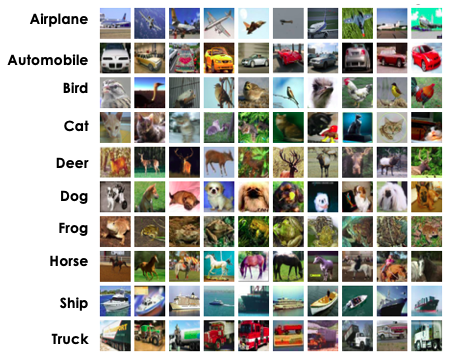

In [9]:
# Getting the dataset as a Tuple

(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

# Constants

In [22]:
LABEL_NAMES = ['airplane', 'automobile','bird','cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Exploring the Data

Lets look at the first image in the dataset

In [20]:
x_train_all.shape

(50000, 32, 32, 3)

In [11]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

#### Using ipython to display the image

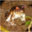

In [12]:
# To use the ipython display to view an image

pic = array_to_img(x_train_all[0])
display(pic)

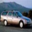

In [18]:
pic = array_to_img(x_train_all[4])
display(pic)

In [19]:
# To check the label 
y_train_all.shape

(50000, 1)

In [24]:
# Note that in the image above the index 1 corresponds to "Automobile" 
# we have a 2 dimension numpy array; that is why we also include " [0] "

y_train_all[4][0]

1

In [26]:
# Using the lable names to get the actual names of classes

LABEL_NAMES[y_train_all[4][0]]

'automobile'

#### Using Matplotlib to view the image

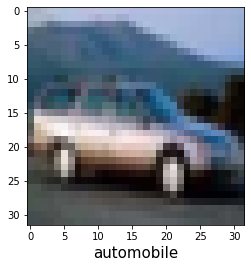

In [30]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]],fontsize=15)
plt.show()

#### Displaying the first 10 images 

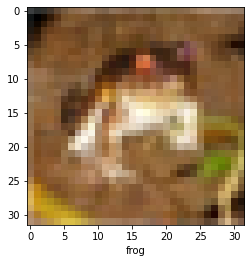

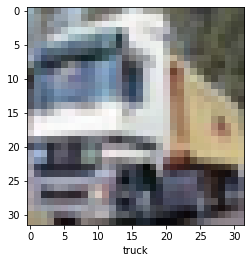

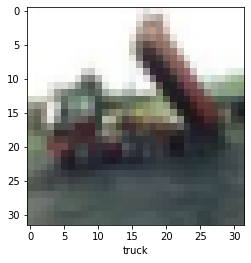

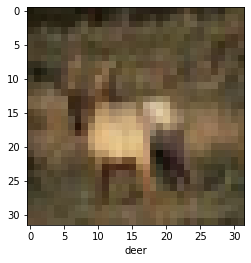

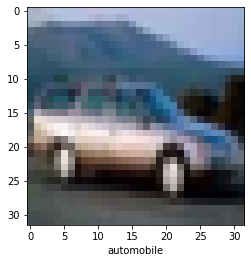

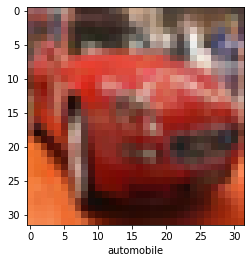

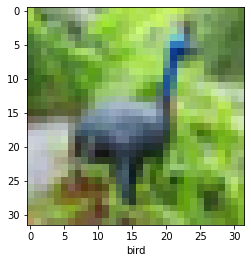

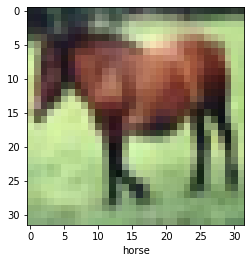

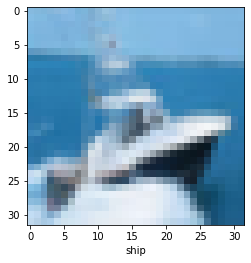

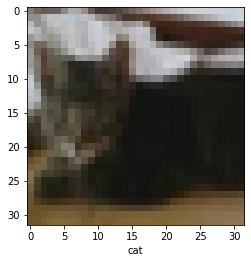

In [32]:
for img in range(10):
    plt.imshow(x_train_all[img])
    plt.xlabel(LABEL_NAMES[y_train_all[img][0]])
    plt.show()

#### Viewing the First 10 images as subplots

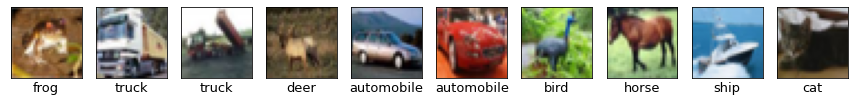

In [38]:
plt.figure(figsize=(15,5))

for img in range(10):
    #subplot(nrows, ncols, index, **kwargs)
    plt.subplot(1, 10, img+1)
    plt.yticks([]) #This removes the tick mark for yaxis
    plt.xticks([]) #This removes the tick mark for yaxis
    plt.xlabel(LABEL_NAMES[y_train_all[img][0]], fontsize=13)
    plt.imshow(x_train_all[img])

In [39]:
x_train_all[0].shape

(32, 32, 3)

### The shape of the image
    * 32, 32 is the weight and the height
    * 3 is the number of channels (These are the number of colors): Red, Green & Blue (RGB)
    
 * x_train_all.shape  >>> (50000, 32, 32, 3)
     * this means we have 50,000 entries | then 32x32  weight and size| 3 colors (RGB)

In [40]:
x_train_all.shape

(50000, 32, 32, 3)

In [42]:
number_of_images, x, y, c = x_train_all.shape
print(f'Number of images = {number_of_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

Number of images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [43]:
x_test.shape

(10000, 32, 32, 3)

# Preprocess Data

#### * We need to preprocess our data so that it is easier to feed it to our neural network.
 

In [44]:
x_train_all[0][0][0]

array([59, 62, 63], dtype=uint8)

In [45]:
# Looking at just a pixle to see the type

type(x_train_all[0][0][0][0])

numpy.uint8

<b>

* uint8 means an unsigned integer... 8-bit integer with no negative sign (-). It means a positive integer 1984 is an example of uint.

* 255 is the maximum number we have RGB
* If we divide x_train_all by 255.0 we will get a float number between 0 and 1.
* Scaling the x_train_all down to between 0 and 1 helps out learning rate. we know the learning rate is typically small
</b>


#### Scalling both x_train and test


In [46]:
x_train_all =x_train_all / 255.0

In [47]:
x_test =  x_test / 255.0

#### We Flatten the images.
* Next, we want to flatten the data, such that the weight, length and channel values can have a single value
* the reshape will take the length of the data which is type x_train_all.shape[0] or use len(type(x_train_all = 5000)



In [49]:
x_train_all.shape

(50000, 32, 32, 3)

In [48]:
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS

In [50]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [51]:
x_train_all.shape

(50000, 3072)

##### Doing the same thing to the test data

In [52]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print(f'Shape of the x_test is: {x_test.shape}')

Shape of the x_test is: (10000, 3072)


# Creating the Validation dataset
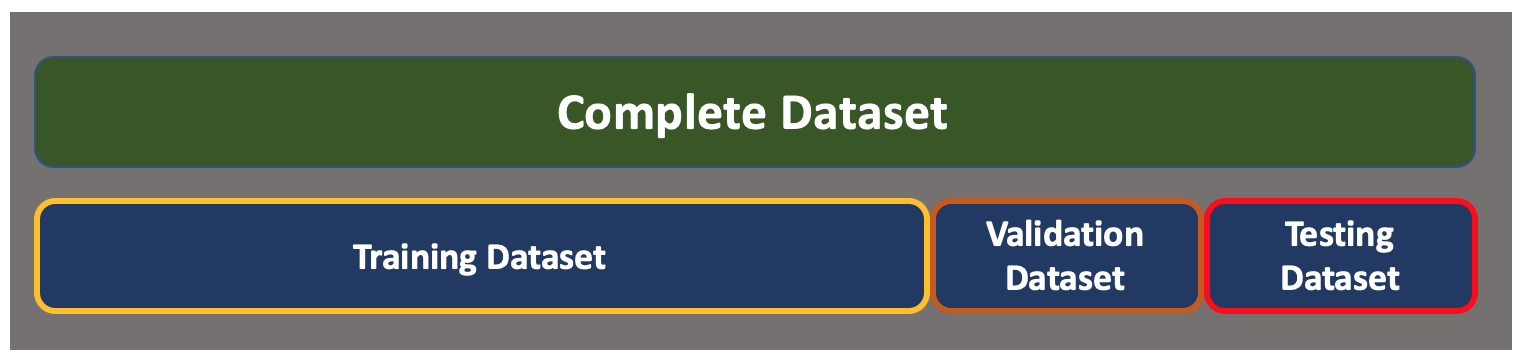

For small data we usually go with:
    * 60% for Training
    * 20% Validation
    * 20% Testing
    
Only the final selected model gets to see the testing data. This helps us to ensure that we have close to real data in real-world when the model is deployed. Only our best model gets to see our testing dataset. Because it will give us a realistic impression of how our model will do in the real world
___

However, if the dataset is enormous.:
    * 1% for is used for validation
    * 1% for is used for testing

In [58]:
VALIDATION_SIZE = 10000

In [55]:
# VALIDATION_SIZE = 10,000 as defined above 

x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

<b>NEXT:</b>
* We Create two NumPy arrays x_train and y_train that have the shape(40000, 3072) and (40000,1) respectively. 
* They will contain the last 40000 values from x_train_all and y_train_all respectively

In [56]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train= y_train_all[VALIDATION_SIZE:]

In [57]:
x_train.shape

(40000, 3072)

## Creating a small dataset just to test run the process
Note this will done away with later. The benefit is that we don't have to train our models on the large set while we are setting things up

* In Summary, We create another small subset of the data with just 1000 data points to test run. By doing this, we save compute time and also make sure all is working correctly before we use our actual x_train and y_train data points

In [59]:
SMALL_TRAIN_SIZE = 1000

In [60]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

# Building the model
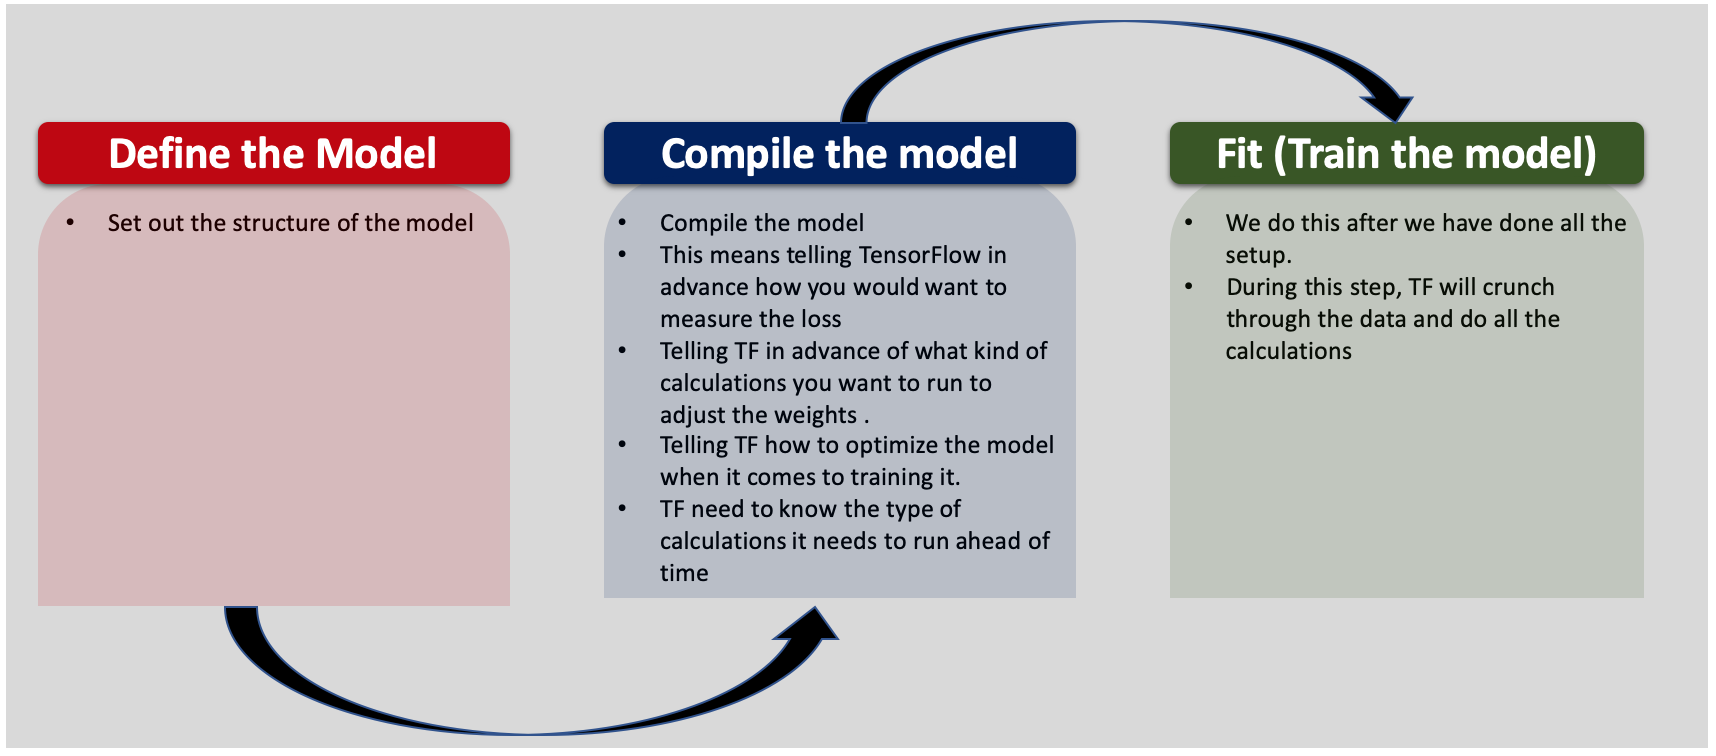

### We will be building a Multilayer Perceptron
* To Setup the structure of our Artificial Neural Network (ANN) We need to first define the Layers
* The very first Layer we need to define is the number of output neurons for the hidden layer and not the input layer (Keras requires a little help before it can automatically work out the input layer.
* since we are working with a coloured image and if the weight and height is 32 x 32, the total number of inputs would be: 32 x 32 x 3 (Because we have a Red Green and Blue for every pixel which would be a 3072
* Once we tell Keras the number of inputs for the first hidden layer, it can work out the inputs for the next hidden layer.
* For the output layer, we would use softmax as the activation function

## **** Define the Neural Network Model using Keras ****

### Model 1

In [106]:
# Defining Model 1
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1_layer'),
    Dense(units=64, activation='relu', name='m1_hidden2_layer'),
    Dense(16, activation='relu', name='m1_hidden3_layer'),
    Dense(10, activation='softmax', name='m1_output_layer')
])


# Compiling Model 1
model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

###### Model 1 Summary

In [65]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1_layer (Dense)     (None, 128)               393344    
_________________________________________________________________
m1_hidden2_layer (Dense)     (None, 64)                8256      
_________________________________________________________________
m1_hidden3_layer (Dense)     (None, 16)                1040      
_________________________________________________________________
m1_output_layer (Dense)      (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Note that: The Total params: 402,810 >> was derived from computing the neurons and the Bias for each layer
(32*32*3*128 + 128) + (128*64 + 64) + (64*16 + 16) + (16*10 + 10)

402810

### Model 2
We will implement Dropout for our input

In [107]:
# Defining Model 2
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation='relu', name='m2_hidden1_layer'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2_layer'))
model_2.add(Dense(15, activation='relu', name='m2_hidden3_layer'))
model_2.add(Dense(10, activation='softmax', name='m2_output_layer'))


# Compiling Model 2
model_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

###### Model 2 Summary

In [70]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 3072)              0         
_________________________________________________________________
m2_hidden1_layer (Dense)     (None, 128)               393344    
_________________________________________________________________
m2_hidden2_layer (Dense)     (None, 64)                8256      
_________________________________________________________________
m2_hidden3_layer (Dense)     (None, 15)                975       
_________________________________________________________________
m2_output_layer (Dense)      (None, 10)                160       
Total params: 402,735
Trainable params: 402,735
Non-trainable params: 0
_________________________________________________________________


# Training the Models

#### Training Model 1 on Extra small Data to Ensure all OK

In [89]:
# Fit function initiates the training of the neural network - 


nr_epochs = 150
history1 = model_1.fit(x_train_xs, y_train_xs, batch_size=1000, epochs=nr_epochs, validation_data=(x_val, y_val))

Epoch 1/150
1/1 [==============================] - 1s 936ms/step - loss: 2.3767 - accuracy: 0.0920 - val_loss: 2.3800 - val_accuracy: 0.1015
Epoch 2/150
1/1 [==============================] - 0s 243ms/step - loss: 2.3728 - accuracy: 0.0980 - val_loss: 2.3289 - val_accuracy: 0.1132
Epoch 3/150
1/1 [==============================] - 0s 218ms/step - loss: 2.3077 - accuracy: 0.1290 - val_loss: 2.3175 - val_accuracy: 0.1272
Epoch 4/150
1/1 [==============================] - 0s 261ms/step - loss: 2.2949 - accuracy: 0.1400 - val_loss: 2.3063 - val_accuracy: 0.1245
Epoch 5/150
1/1 [==============================] - 0s 233ms/step - loss: 2.2831 - accuracy: 0.1520 - val_loss: 2.2776 - val_accuracy: 0.1426
Epoch 6/150
1/1 [==============================] - 0s 229ms/step - loss: 2.2559 - accuracy: 0.1730 - val_loss: 2.2549 - val_accuracy: 0.1635
Epoch 7/150
1/1 [==============================] - 0s 213ms/step - loss: 2.2342 - accuracy: 0.1760 - val_loss: 2.2388 - val_accuracy: 0.1618
Epoch 8/150
1

Epoch 59/150
1/1 [==============================] - 0s 257ms/step - loss: 1.9100 - accuracy: 0.3180 - val_loss: 2.0714 - val_accuracy: 0.2254
Epoch 60/150
1/1 [==============================] - 0s 430ms/step - loss: 1.9033 - accuracy: 0.3200 - val_loss: 2.0751 - val_accuracy: 0.2268
Epoch 61/150
1/1 [==============================] - 0s 250ms/step - loss: 1.8975 - accuracy: 0.3180 - val_loss: 2.0671 - val_accuracy: 0.2250
Epoch 62/150
1/1 [==============================] - 0s 246ms/step - loss: 1.8914 - accuracy: 0.3230 - val_loss: 2.0759 - val_accuracy: 0.2305
Epoch 63/150
1/1 [==============================] - 0s 329ms/step - loss: 1.8855 - accuracy: 0.3210 - val_loss: 2.0634 - val_accuracy: 0.2269
Epoch 64/150
1/1 [==============================] - 0s 247ms/step - loss: 1.8807 - accuracy: 0.3260 - val_loss: 2.0754 - val_accuracy: 0.2304
Epoch 65/150
1/1 [==============================] - 0s 275ms/step - loss: 1.8758 - accuracy: 0.3220 - val_loss: 2.0607 - val_accuracy: 0.2277
Epoch 

#### Training Model 2 on Extra small Data to Ensure all OK

In [74]:
nr_epochs = 150
history2 =  model_2.fit(x_train_xs, y_train_xs, batch_size=1000, epochs=nr_epochs, validation_data=(x_val, y_val))

Epoch 1/150
1/1 [==============================] - 2s 2s/step - loss: 2.4540 - accuracy: 0.0830 - val_loss: 2.7236 - val_accuracy: 0.1000
Epoch 2/150
1/1 [==============================] - 1s 582ms/step - loss: 2.7265 - accuracy: 0.1190 - val_loss: 2.4185 - val_accuracy: 0.1069
Epoch 3/150
1/1 [==============================] - 1s 569ms/step - loss: 2.4296 - accuracy: 0.0940 - val_loss: 2.3734 - val_accuracy: 0.1167
Epoch 4/150
1/1 [==============================] - 0s 354ms/step - loss: 2.3810 - accuracy: 0.1050 - val_loss: 2.3271 - val_accuracy: 0.0951
Epoch 5/150
1/1 [==============================] - 0s 360ms/step - loss: 2.3172 - accuracy: 0.1140 - val_loss: 2.3138 - val_accuracy: 0.0825
Epoch 6/150
1/1 [==============================] - 1s 562ms/step - loss: 2.3068 - accuracy: 0.0910 - val_loss: 2.3029 - val_accuracy: 0.1098
Epoch 7/150
1/1 [==============================] - 0s 455ms/step - loss: 2.3045 - accuracy: 0.0960 - val_loss: 2.2886 - val_accuracy: 0.1422
Epoch 8/150
1/1 

Epoch 59/150
1/1 [==============================] - 0s 407ms/step - loss: 1.8837 - accuracy: 0.3430 - val_loss: 2.0469 - val_accuracy: 0.2468
Epoch 60/150
1/1 [==============================] - 0s 406ms/step - loss: 1.8882 - accuracy: 0.3140 - val_loss: 2.0335 - val_accuracy: 0.2590
Epoch 61/150
1/1 [==============================] - 1s 577ms/step - loss: 1.8751 - accuracy: 0.3290 - val_loss: 2.0308 - val_accuracy: 0.2623
Epoch 62/150
1/1 [==============================] - 1s 711ms/step - loss: 1.8681 - accuracy: 0.3320 - val_loss: 2.0375 - val_accuracy: 0.2551
Epoch 63/150
1/1 [==============================] - 1s 626ms/step - loss: 1.8586 - accuracy: 0.3320 - val_loss: 2.0228 - val_accuracy: 0.2662
Epoch 64/150
1/1 [==============================] - 0s 490ms/step - loss: 1.8468 - accuracy: 0.3530 - val_loss: 2.0198 - val_accuracy: 0.2693
Epoch 65/150
1/1 [==============================] - 1s 996ms/step - loss: 1.8542 - accuracy: 0.3510 - val_loss: 2.0370 - val_accuracy: 0.2578
Epoch 

### Training Model 1 (Training set)

In [108]:
nr_epochs = 100
history3 = model_1.fit(x_train, y_train, batch_size=1000, epochs=nr_epochs, validation_data=(x_val, y_val))

Epoch 1/100
40/40 [==============================] - 7s 128ms/step - loss: 2.2616 - accuracy: 0.1575 - val_loss: 2.0986 - val_accuracy: 0.2300
Epoch 2/100
40/40 [==============================] - 2s 53ms/step - loss: 2.0846 - accuracy: 0.2183 - val_loss: 2.0162 - val_accuracy: 0.2451
Epoch 3/100
40/40 [==============================] - 2s 62ms/step - loss: 2.0019 - accuracy: 0.2374 - val_loss: 1.9328 - val_accuracy: 0.2842
Epoch 4/100
40/40 [==============================] - 2s 63ms/step - loss: 1.9025 - accuracy: 0.3027 - val_loss: 1.8495 - val_accuracy: 0.3303
Epoch 5/100
40/40 [==============================] - 3s 70ms/step - loss: 1.8571 - accuracy: 0.3289 - val_loss: 1.8291 - val_accuracy: 0.3312
Epoch 6/100
40/40 [==============================] - 2s 51ms/step - loss: 1.8113 - accuracy: 0.3478 - val_loss: 1.7673 - val_accuracy: 0.3645
Epoch 7/100
40/40 [==============================] - 2s 45ms/step - loss: 1.7688 - accuracy: 0.3629 - val_loss: 1.7557 - val_accuracy: 0.3710
Epoch

### Training Model 2 (Training set)

In [109]:
nr_epochs = 100
history4 =  model_2.fit(x_train, y_train, batch_size=1000, epochs=nr_epochs, validation_data=(x_val, y_val))

Epoch 1/100
40/40 [==============================] - 4s 76ms/step - loss: 2.3243 - accuracy: 0.1195 - val_loss: 2.2292 - val_accuracy: 0.1798
Epoch 2/100
40/40 [==============================] - 3s 66ms/step - loss: 2.2223 - accuracy: 0.1865 - val_loss: 2.1774 - val_accuracy: 0.2121
Epoch 3/100
40/40 [==============================] - 3s 70ms/step - loss: 2.1651 - accuracy: 0.2168 - val_loss: 2.1500 - val_accuracy: 0.2089
Epoch 4/100
40/40 [==============================] - 3s 65ms/step - loss: 2.1121 - accuracy: 0.2311 - val_loss: 2.0207 - val_accuracy: 0.2707
Epoch 5/100
40/40 [==============================] - 3s 67ms/step - loss: 2.0127 - accuracy: 0.2638 - val_loss: 1.9860 - val_accuracy: 0.2596
Epoch 6/100
40/40 [==============================] - 2s 58ms/step - loss: 1.9541 - accuracy: 0.2840 - val_loss: 1.8960 - val_accuracy: 0.2996
Epoch 7/100
40/40 [==============================] - 3s 64ms/step - loss: 1.9048 - accuracy: 0.2970 - val_loss: 1.8600 - val_accuracy: 0.3120
Epoch 

# Neural network (evaluation)

#### Evaluate Model 1 on Extra small Data to Ensure all OK

In [90]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

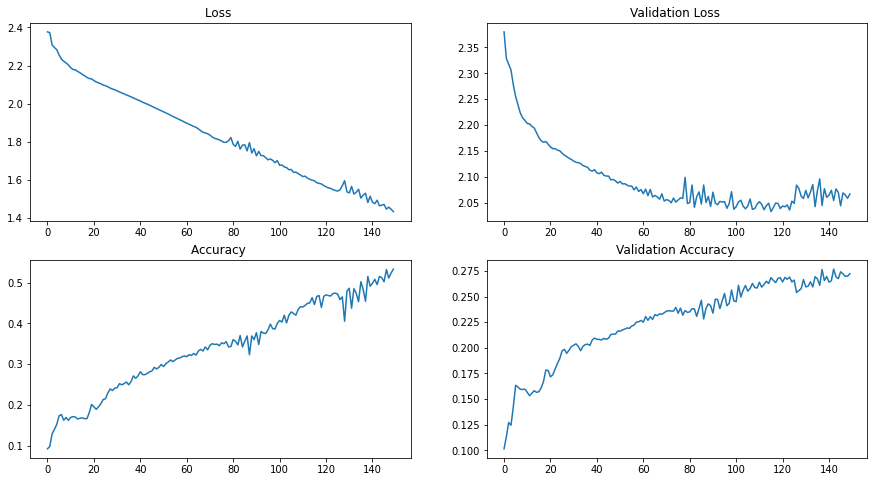

In [101]:
plt.figure(figsize=(15,8))


    #subplot(nrows, ncols, index, **kwargs)
plt.subplot(2, 2, 1)
plt.plot(history1.history['loss'])
plt.title('Loss ')


plt.subplot(2, 2, 2)
plt.plot(history1.history['val_loss'])
plt.title('Validation Loss ')

    #subplot(nrows, ncols, index, **kwargs)
plt.subplot(2, 2, 3)
plt.plot(history1.history['accuracy'])
plt.title('Accuracy ')


plt.subplot(2, 2, 4)
plt.plot(history1.history['val_accuracy'])
plt.title('Validation Accuracy ')
plt.show()



<b> * We notice that the lost starts to rise for on the validation Loss plot after about 120 epochs. This is interesting becasue this can be caused by overfitting </b>

#### Evaluate Model 2 on Extra small Data to Ensure all OK

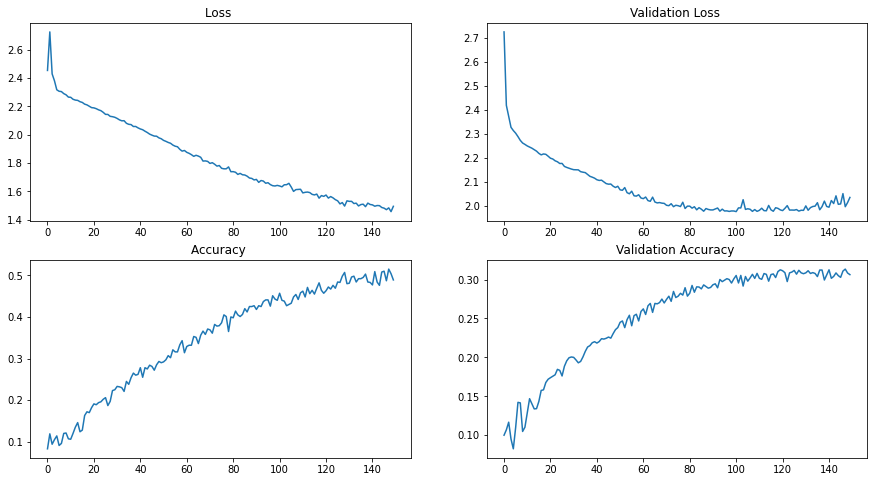

In [100]:
plt.figure(figsize=(15,8))


    #subplot(nrows, ncols, index, **kwargs)
plt.subplot(2, 2, 1)
plt.plot(history2.history['loss'])
plt.title('Loss ')


plt.subplot(2, 2, 2)
plt.plot(history2.history['val_loss'])
plt.title('Validation Loss ')

    #subplot(nrows, ncols, index, **kwargs)
plt.subplot(2, 2, 3)
plt.plot(history2.history['accuracy'])
plt.title('Accuracy ')


plt.subplot(2, 2, 4)
plt.plot(history2.history['val_accuracy'])
plt.title('Validation Accuracy ')
plt.show()





#### * This shows that the Dropout does reduce overfitting, but it will not eliminate it completely.

#### * It would make sense for us to use some combination of early stopping to train our model at a certain point and the dropout technique to get a better result.

### Evaluate Model 1 

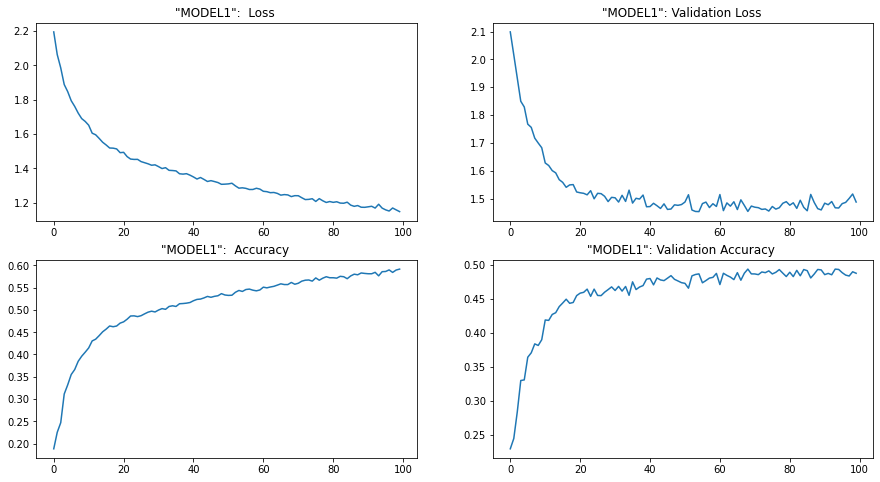

In [111]:
plt.figure(figsize=(15,8))


    #subplot(nrows, ncols, index, **kwargs)
plt.subplot(2, 2, 1)
plt.plot(history3.history['loss'])
plt.title('"MODEL1":  Loss ')


plt.subplot(2, 2, 2)
plt.plot(history3.history['val_loss'])
plt.title('"MODEL1": Validation Loss ')

    #subplot(nrows, ncols, index, **kwargs)
plt.subplot(2, 2, 3)
plt.plot(history3.history['accuracy'])
plt.title('"MODEL1":  Accuracy ')


plt.subplot(2, 2, 4)
plt.plot(history3.history['val_accuracy'])
plt.title('"MODEL1": Validation Accuracy ')
plt.show()


### Evaluate Model 2

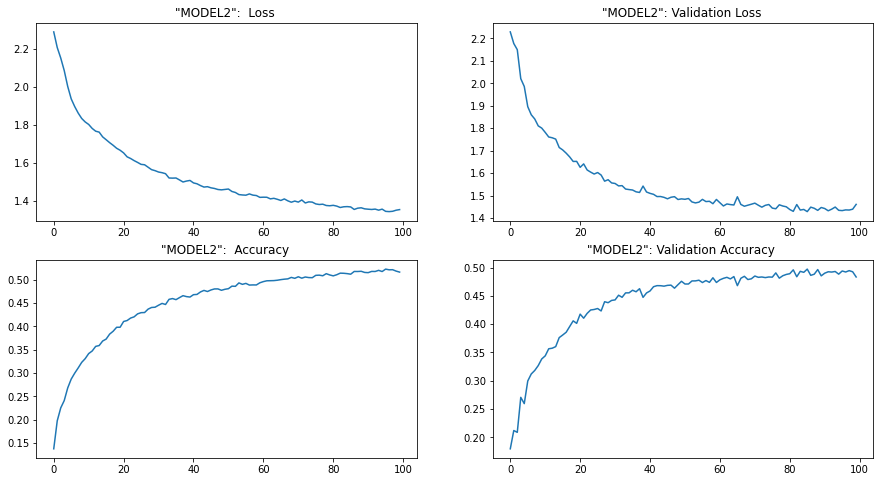

In [112]:
plt.figure(figsize=(15,8))


    #subplot(nrows, ncols, index, **kwargs)
plt.subplot(2, 2, 1)
plt.plot(history4.history['loss'])
plt.title('"MODEL2":  Loss ')


plt.subplot(2, 2, 2)
plt.plot(history4.history['val_loss'])
plt.title('"MODEL2": Validation Loss ')

    #subplot(nrows, ncols, index, **kwargs)
plt.subplot(2, 2, 3)
plt.plot(history4.history['accuracy'])
plt.title('"MODEL2":  Accuracy ')


plt.subplot(2, 2, 4)
plt.plot(history4.history['val_accuracy'])
plt.title('"MODEL2": Validation Accuracy ')
plt.show()


# Predictions on Individual Images

In [116]:
x_val.shape

(10000, 3072)

In [113]:
# Looking at the first Image - and it is flattened
x_val[0].shape

(3072,)

In [114]:
#Making it 2 dimesion
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [117]:
model_2.predict(test)

array([[0.04826598, 0.05791777, 0.10321157, 0.11305971, 0.12546448,
        0.09733392, 0.3613597 , 0.07889555, 0.00373568, 0.01075562]],
      dtype=float32)

model_2.predict(test) >>>

array([[0.04826598, 0.05791777, 0.10321157, 0.11305971, 0.12546448,
        0.09733392, 0.3613597 , 0.07889555, 0.00373568, 0.01075562]],
      dtype=float32)
      
      These are the predictions for all the classes - Thanks to the softmax

In [118]:
# If we want to predict all the values in the x_val

model_2.predict(x_val).shape

(10000, 10)

#### If we were only interested in the predict class

In [119]:
model_2.predict_classes(test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([6])

In [121]:
# checking the actual label for the first image

y_val[0]

array([6], dtype=uint8)

#### Checking the actual value and the predicted value for the first 10 images in the valuation dataset. 

In [122]:
for number in range(10):
    test_images = np.expand_dims(x_val[number], axis=0)
    predicted_values = model_2.predict_classes(test_images)[0]
    print(f'Actual value: {y_val[number][0]} vs. predicted: {predicted_values}')

Actual value: 6 vs. predicted: 6
Actual value: 9 vs. predicted: 1
Actual value: 9 vs. predicted: 9
Actual value: 4 vs. predicted: 4
Actual value: 1 vs. predicted: 1
Actual value: 1 vs. predicted: 9
Actual value: 2 vs. predicted: 1
Actual value: 7 vs. predicted: 7
Actual value: 8 vs. predicted: 8
Actual value: 3 vs. predicted: 9


# Evaluation on Test Data

In [123]:
model_2.metrics_names

['loss', 'accuracy']

In [124]:
# Formatting the result: "test_loss" to 3 decimal places, while "test_Accuracy" to percentage 1 decimal place

test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 1s 3ms/step - loss: 1.4601 - accuracy: 0.4834
Test loss is 1.46 and test accuracy is 48.3%


# Confusion Matrix

In [126]:
predictions = model_2.predict_classes(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [127]:
conf_matrix.shape

(10, 10)

In [128]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [129]:
# Showing the value with th
conf_matrix.max()

685

In [130]:
conf_matrix.min()

3

In [134]:
NR_CLASSES = 10

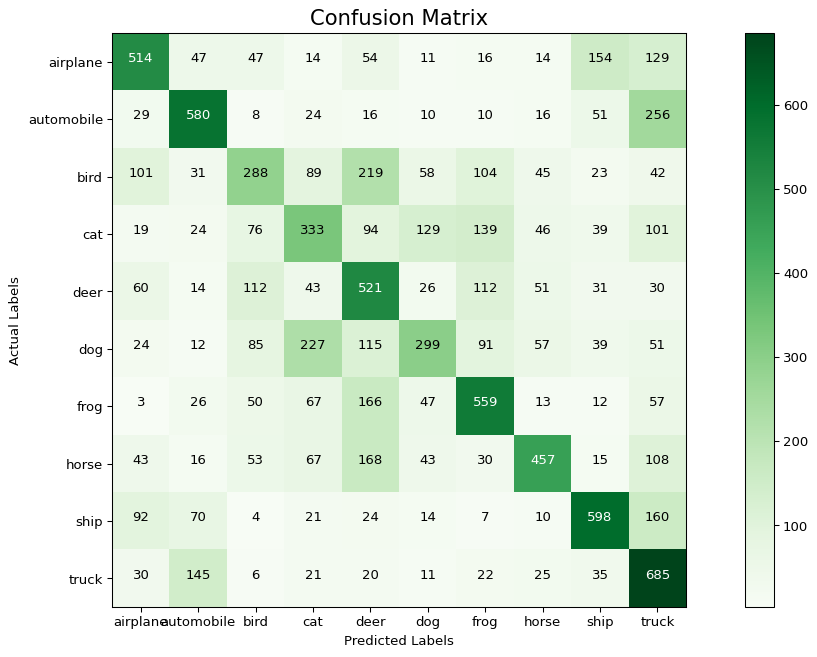

In [143]:
plt.figure(figsize=(16,8), dpi=95)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16) # Title for the plot
plt.ylabel('Actual Labels', fontsize=10) # y lable
plt.xlabel('Predicted Labels', fontsize=10) #

tick_marks = np.arange(NR_CLASSES)  # Formatting Tick marks for our actual classes
plt.yticks(tick_marks, LABEL_NAMES) # Assigning the classes to the label name for Y-axis
plt.xticks(tick_marks, LABEL_NAMES) #Assigning the classes to the label name for X-axis

plt.colorbar() # This shows a color bar to the right

# Using the pythin itertools to loop through 2 values i j (rows & columns) ...
# ...to print the actual values on the conf matrix
# plt.text(j, i, conf_matrix[i, j]) {conf_matrix[i, j]} ->pulls out the actual values from the conf matrix

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center',
            color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')
    

plt.show()